# Load Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/Thesis/Paper2

/content/drive/MyDrive/Thesis/Paper2


# Imports + Load Data

In [3]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import makedata        # to get the CIFAR10 data in the required format
import models

In [4]:
totalClass = 4
shufflePixels = True
shuffleLabels = False

In [5]:
# Load data
x_train, y_train, x_test, y_test, a, b = makedata.cifar(totalClass, shufflePixels)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

loaded data_batch_1
len of data_batch_1 :  10000
len of training data  10000
loaded data_batch_2
len of data_batch_2 :  10000
len of training data  20000
loaded data_batch_3
len of data_batch_3 :  10000
len of training data  30000
loaded data_batch_4
len of data_batch_4 :  10000
len of training data  40000
loaded data_batch_5
len of data_batch_5 :  10000
len of training data  50000
(20000, 32, 32, 3)
(20000, 32, 32, 3)
(20000, 4)
(4000, 32, 32, 3)
(4000, 4)


Populating the interactive namespace from numpy and matplotlib


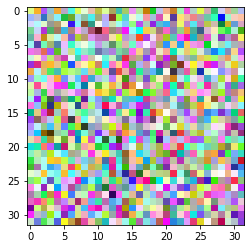

In [6]:
# Check Image data
im = x_train[88]
%pylab inline
imgplot = plt.imshow(im)
plt.show()

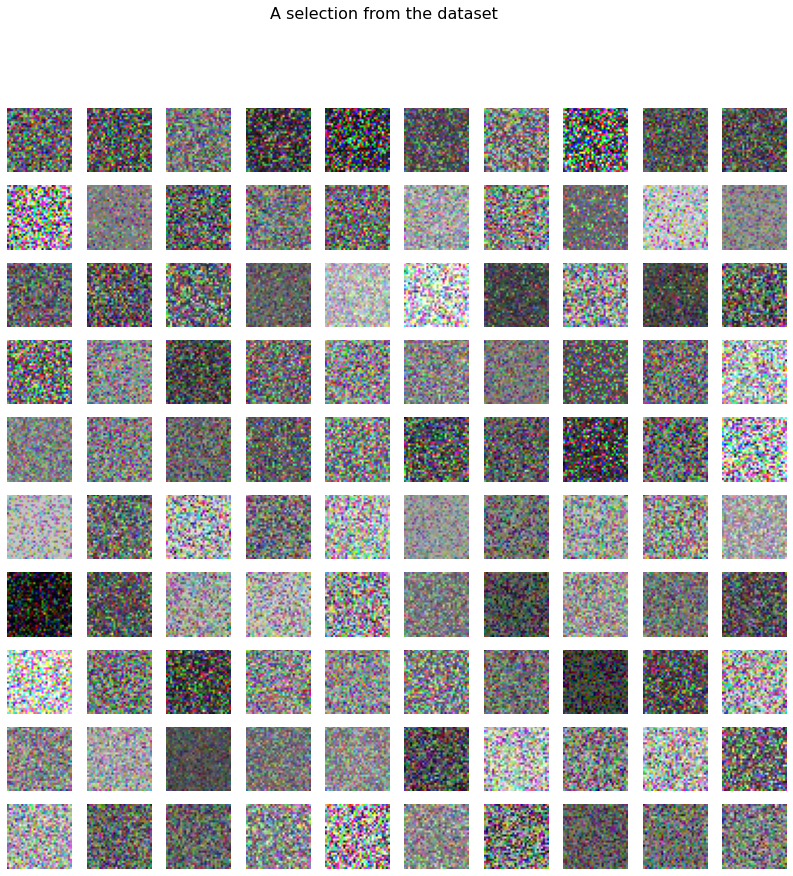

In [7]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(14, 14))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(x_train[idx], cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the dataset", fontsize=16)

#VGG16

In [8]:
vgg16 = models.vgg16(totalClass)
vgg16.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [9]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
40/40 [==============================] - 10s 33ms/step - loss: 1.3858 - accuracy: 0.2500
test loss, test acc: [1.385800838470459, 0.25]
Evaluate on test data
8/8 [==============================] - 1s 175ms/step - loss: 1.3860 - accuracy: 0.2500
test loss, test acc: [1.3859819173812866, 0.25]


In [10]:
vggResults = vgg16.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
200/200 [==============================] - 8s 33ms/step - loss: 1.3494 - accuracy: 0.3264 - val_loss: 1.2994 - val_accuracy: 0.3647
Epoch 2/250
200/200 [==============================] - 6s 32ms/step - loss: 1.3152 - accuracy: 0.3561 - val_loss: 1.3227 - val_accuracy: 0.3413
Epoch 3/250
200/200 [==============================] - 6s 30ms/step - loss: 1.3033 - accuracy: 0.3720 - val_loss: 1.2789 - val_accuracy: 0.3765
Epoch 4/250
200/200 [==============================] - 6s 30ms/step - loss: 1.2935 - accuracy: 0.3845 - val_loss: 1.2810 - val_accuracy: 0.4123
Epoch 5/250
200/200 [==============================] - 6s 32ms/step - loss: 1.2902 - accuracy: 0.3871 - val_loss: 1.2994 - val_accuracy: 0.4160
Epoch 6/250
200/200 [==============================] - 6s 32ms/step - loss: 1.2836 - accuracy: 0.3975 - val_loss: 1.2803 - val_accuracy: 0.4248
Epoch 7/250
200/200 [==============================] - 6s 30ms/step - loss: 1.2835 - accuracy: 0.4004 - val_loss: 1.2645 - val_accuracy:

In [11]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
40/40 [==============================] - 1s 30ms/step - loss: 2.1618e-06 - accuracy: 1.0000
test loss, test acc: [2.1618259324895917e-06, 1.0]
Evaluate on test data
8/8 [==============================] - 0s 29ms/step - loss: 11.0613 - accuracy: 0.3070
test loss, test acc: [11.061336517333984, 0.3070000112056732]


# Small

In [12]:
small = models.small(totalClass)
small.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
40/40 [==============================] - 1s 7ms/step - loss: 11.1048 - accuracy: 0.2475
test loss, test acc: [11.104766845703125, 0.24754999577999115]
Evaluate on test data
8/8 [==============================] - 0s 21ms/step - loss: 11.1690 - accuracy: 0.2558
test loss, test acc: [11.1690034866333, 0.25575000047683716]


In [14]:
smallResults = small.fit(x_train, y_train, 
                         batch_size=100, 
                         epochs=250, 
                         validation_data=(x_test, y_test))

Epoch 1/250
200/200 [==============================] - 2s 8ms/step - loss: 4.4842 - accuracy: 0.2801 - val_loss: 1.3632 - val_accuracy: 0.3198
Epoch 2/250
200/200 [==============================] - 1s 7ms/step - loss: 1.3506 - accuracy: 0.3279 - val_loss: 1.3338 - val_accuracy: 0.3415
Epoch 3/250
200/200 [==============================] - 1s 7ms/step - loss: 1.3280 - accuracy: 0.3324 - val_loss: 1.3441 - val_accuracy: 0.3478
Epoch 4/250
200/200 [==============================] - 1s 7ms/step - loss: 1.3116 - accuracy: 0.3506 - val_loss: 1.3454 - val_accuracy: 0.3465
Epoch 5/250
200/200 [==============================] - 1s 7ms/step - loss: 1.3097 - accuracy: 0.3565 - val_loss: 1.3339 - val_accuracy: 0.3573
Epoch 6/250
200/200 [==============================] - 1s 7ms/step - loss: 1.3058 - accuracy: 0.3582 - val_loss: 1.3396 - val_accuracy: 0.3548
Epoch 7/250
200/200 [==============================] - 1s 7ms/step - loss: 1.3066 - accuracy: 0.3586 - val_loss: 1.3183 - val_accuracy: 0.3627

In [15]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
40/40 [==============================] - 0s 7ms/step - loss: 0.8318 - accuracy: 0.6874
test loss, test acc: [0.831814169883728, 0.6874499917030334]
Evaluate on test data
8/8 [==============================] - 0s 7ms/step - loss: 1.4270 - accuracy: 0.3160
test loss, test acc: [1.4269630908966064, 0.3160000145435333]


#tNet

In [16]:
tNet = models.tNet(totalClass)
tNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [17]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
40/40 [==============================] - 3s 41ms/step - loss: 2.0980 - accuracy: 0.2565
test loss, test acc: [2.0979959964752197, 0.2565000057220459]
Evaluate on test data
8/8 [==============================] - 1s 119ms/step - loss: 2.1058 - accuracy: 0.2565
test loss, test acc: [2.105794668197632, 0.2565000057220459]


In [18]:
tNetResults = tNet.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
200/200 [==============================] - 10s 43ms/step - loss: 1.3939 - accuracy: 0.3618 - val_loss: 1.2852 - val_accuracy: 0.3985
Epoch 2/250
200/200 [==============================] - 8s 40ms/step - loss: 1.2207 - accuracy: 0.4498 - val_loss: 1.2789 - val_accuracy: 0.4083
Epoch 3/250
200/200 [==============================] - 8s 40ms/step - loss: 1.1071 - accuracy: 0.5176 - val_loss: 1.3342 - val_accuracy: 0.4033
Epoch 4/250
200/200 [==============================] - 8s 39ms/step - loss: 0.9485 - accuracy: 0.6120 - val_loss: 1.4324 - val_accuracy: 0.3885
Epoch 5/250
200/200 [==============================] - 8s 40ms/step - loss: 0.7642 - accuracy: 0.7023 - val_loss: 1.5267 - val_accuracy: 0.3685
Epoch 6/250
200/200 [==============================] - 8s 40ms/step - loss: 0.5876 - accuracy: 0.7904 - val_loss: 1.6267 - val_accuracy: 0.3485
Epoch 7/250
200/200 [==============================] - 8s 39ms/step - loss: 0.4365 - accuracy: 0.8558 - val_loss: 1.8388 - val_accuracy

In [19]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
40/40 [==============================] - 2s 39ms/step - loss: 0.0084 - accuracy: 0.9987
test loss, test acc: [0.008420535363256931, 0.9987499713897705]
Evaluate on test data
8/8 [==============================] - 0s 39ms/step - loss: 4.4600 - accuracy: 0.3705
test loss, test acc: [4.460017204284668, 0.37049999833106995]


# ConvNet

In [20]:
convNet = models.convNet(totalClass)
convNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [21]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
40/40 [==============================] - 4s 52ms/step - loss: 4.4851 - accuracy: 0.2500
test loss, test acc: [4.48506498336792, 0.25]
Evaluate on test data
8/8 [==============================] - 2s 286ms/step - loss: 4.4867 - accuracy: 0.2500
test loss, test acc: [4.4867401123046875, 0.25]


In [22]:
convNetResults = convNet.fit(x_train,y_train,
                             batch_size=100,
                             epochs=250,
                             validation_data=(x_test, y_test))

Epoch 1/250
200/200 [==============================] - 9s 41ms/step - loss: 1.3409 - accuracy: 0.3880 - val_loss: 1.3133 - val_accuracy: 0.4000
Epoch 2/250
200/200 [==============================] - 8s 40ms/step - loss: 1.2631 - accuracy: 0.4103 - val_loss: 1.2615 - val_accuracy: 0.4218
Epoch 3/250
200/200 [==============================] - 8s 40ms/step - loss: 1.2579 - accuracy: 0.4124 - val_loss: 1.3530 - val_accuracy: 0.3932
Epoch 4/250
200/200 [==============================] - 8s 39ms/step - loss: 1.2538 - accuracy: 0.4156 - val_loss: 1.3323 - val_accuracy: 0.4070
Epoch 5/250
200/200 [==============================] - 8s 40ms/step - loss: 1.2470 - accuracy: 0.4230 - val_loss: 1.2649 - val_accuracy: 0.4195
Epoch 6/250
200/200 [==============================] - 8s 40ms/step - loss: 1.2459 - accuracy: 0.4193 - val_loss: 1.2558 - val_accuracy: 0.4250
Epoch 7/250
200/200 [==============================] - 8s 39ms/step - loss: 1.2434 - accuracy: 0.4215 - val_loss: 1.2790 - val_accuracy:

In [23]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
40/40 [==============================] - 2s 46ms/step - loss: 0.0105 - accuracy: 0.9959
test loss, test acc: [0.010450278408825397, 0.9958500266075134]
Evaluate on test data
8/8 [==============================] - 0s 46ms/step - loss: 4.2118 - accuracy: 0.3670
test loss, test acc: [4.211826324462891, 0.367000013589859]


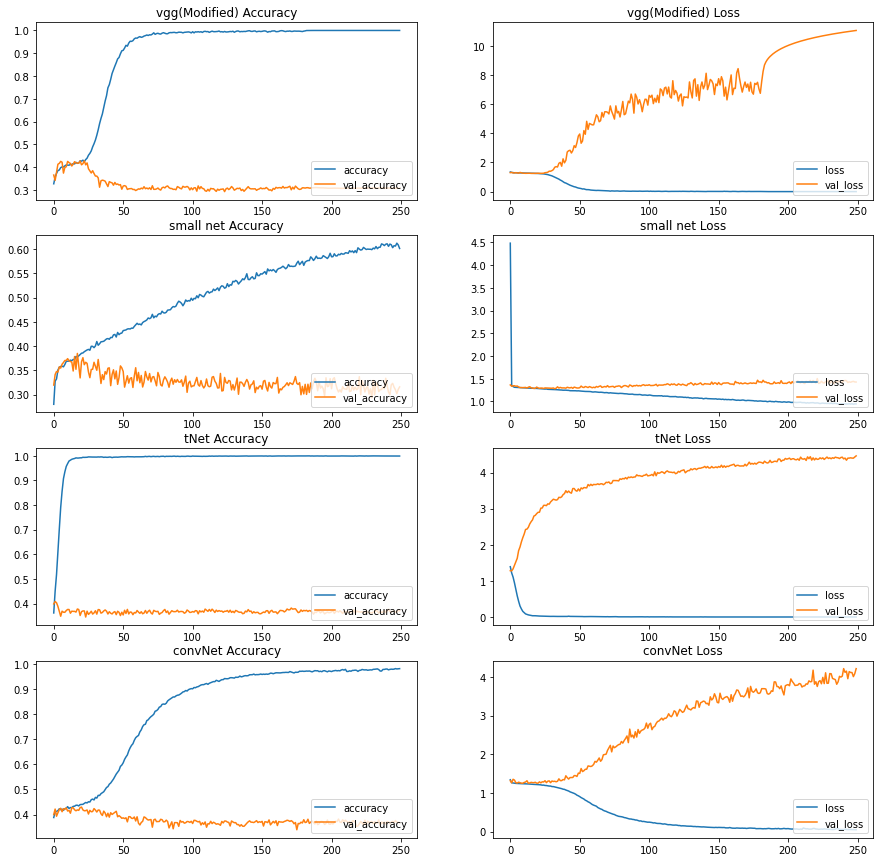

In [24]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
i = 0
name = ['vgg(Modified)', 'small net', 'tNet', 'convNet']
for history in [vggResults, smallResults, tNetResults, convNetResults]:
    axs[i, 0].set_title(name[i]+" Accuracy", fontsize=12)
    axs[i, 0].plot(history.history['accuracy'], label='accuracy')
    axs[i, 0].plot(history.history['val_accuracy'], label = 'val_accuracy')
    #axs[i, 0].xlabel('Epoch')
    #axs[i, 0].ylabel('Accuracy')
    #axs[i, 0].ylim([0.5, 1])
    axs[i, 0].legend(loc='lower right')

    axs[i, 1].set_title(name[i]+" Loss", fontsize=12)
    axs[i, 1].plot(history.history['loss'], label='loss')
    axs[i, 1].plot(history.history['val_loss'], label = 'val_loss')
    #axs[i, 1].xlabel('Epoch')
    #axs[i, 1].ylabel('Loss')
    #axs[i, 1].ylim([0.0, 4.0])
    axs[i, 1].legend(loc='lower right')
    i = i + 1
